In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from path import Path
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

In [2]:
file_path = Path("/Users/Emily/documents/class_data/final_group_airbnb/Resources/cleaned_airbnb_dataset4.csv")
airbnb_df = pd.read_csv(file_path, index_col=0)
airbnb_df.head()

,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,...,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total,Median,Mean,Pop
room_id,,,,,,,,,,,,,,,,,,,,,
958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,...,37.76931,-122.43386,217,97.0,170.0,100.0,270.0,84802.0,112291.0,39169.0
3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,...,37.75402,-122.45805,160,94.0,99.0,10.0,109.0,97834.0,126303.0,26881.0
5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,...,37.74511,-122.42102,111,98.0,235.0,100.0,335.0,75106.0,98470.0,69333.0
7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76669,-122.45250,18,86.0,65.0,50.0,115.0,84802.0,112291.0,39169.0
8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76487,-122.45183,8,93.0,65.0,50.0,115.0,84802.0,112291.0,39169.0


In [3]:
airbnb2_df = airbnb_df.drop(['host_id','host_is_superhost','property_type','room_type','latitude','longitude','neighborhood','zipcode'], axis=1)

In [4]:
airbnb2_df.head()

,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,reviews,review_scores_rating,price,cleaning_fee,total,Median,Mean,Pop
room_id,,,,,,,,,,,,,
958,3,1.0,1.0,1,30,217,97.0,170.0,100.0,270.0,84802.0,112291.0,39169.0
3850,2,1.0,1.0,1,5,160,94.0,99.0,10.0,109.0,97834.0,126303.0,26881.0
5858,5,2.0,1.0,30,60,111,98.0,235.0,100.0,335.0,75106.0,98470.0,69333.0
7918,2,1.0,4.0,32,60,18,86.0,65.0,50.0,115.0,84802.0,112291.0,39169.0
8142,2,1.0,4.0,32,90,8,93.0,65.0,50.0,115.0,84802.0,112291.0,39169.0


In [5]:
airbnb2_df.dtypes

accommodates              int64
bedrooms                float64
bathrooms               float64
minimum_nights            int64
maximum_nights            int64
reviews                   int64
review_scores_rating    float64
price                   float64
cleaning_fee            float64
total                   float64
Median                  float64
Mean                    float64
Pop                     float64
dtype: object

In [6]:
airbnb2_df.astype(int)

,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,reviews,review_scores_rating,price,cleaning_fee,total,Median,Mean,Pop
room_id,,,,,,,,,,,,,
958,3,1,1,1,30,217,97,170,100,270,84802,112291,39169
3850,2,1,1,1,5,160,94,99,10,109,97834,126303,26881
5858,5,2,1,30,60,111,98,235,100,335,75106,98470,69333
7918,2,1,4,32,60,18,86,65,50,115,84802,112291,39169
8142,2,1,4,32,90,8,93,65,50,115,84802,112291,39169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,4,1,1,2,1125,0,0,113,75,188,84802,112291,39169
39342094,5,3,2,30,1125,0,0,699,150,849,75106,98470,69333
39343373,4,1,1,1,7,0,0,200,0,200,29613,44237,31176


All Features Tested

In [7]:
target_col = 'total'
training_col = ['accommodates','bedrooms','bathrooms','minimum_nights',
                'maximum_nights','reviews','review_scores_rating','price','cleaning_fee','Median','Mean','Pop']


In [8]:
train = np.random.choice([True, False], airbnb2_df.shape[0], replace=True, p=[0.8, 0.2])
airbnb_train = airbnb2_df.iloc[train,:]
airbnb_test = airbnb2_df.iloc[~train,:]

In [9]:
x_train = airbnb_train[training_col].values
x_test = airbnb_test[training_col].values
y_train = airbnb_train[target_col].values
y_test = airbnb_test[target_col].values
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6252, 12) (1563, 12) (6252,) (1563,)


In [10]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [11]:
knn = KNeighborsRegressor(n_neighbors=1, algorithm="brute")

In [12]:
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=1)

In [13]:
#predict from xtrain
#y_pred = knn.predict(x_train)

#print("Training Data")
#print("R^2 value using score fn: %.3f" % knn.score(x_train,y_train))
#print("Mean Squared Log Error : %0.3f" % mean_squared_error(y_train,y_pred))

#print("Mean Squared Error : %0.3f" % mean_squared_error(np.exp(y_train),np.exp(y_pred)))
#print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_train,y_pred)))

In [14]:
# predict from xtest
y_pred = knn.predict(x_test)

print("Training Data")
print("R^2 value using score fn: %.3f" % knn.score(x_test,y_test))
print("Mean Squared Log Error : %0.3f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_test,y_pred)))

Training Data
R^2 value using score fn: 0.736
Mean Squared Log Error : 43686.890
Root Mean Squared Error 209.0140903269785


In [15]:
# knn = KNeighborsRegressor(n_neighbors=1, algorithm="brute")

5 Features Tested

In [16]:
target_col2 = 'total'
training_col2 = ['accommodates','bedrooms','bathrooms','minimum_nights','maximum_nights','review_scores_rating']

In [17]:
train2 = np.random.choice([True, False], airbnb2_df.shape[0], replace=True, p=[0.8, 0.2])
airbnb_train2 = airbnb2_df.iloc[train,:]
airbnb_test2 = airbnb2_df.iloc[~train,:]

In [18]:
x_train2 = airbnb_train[training_col2].values
x_test2 = airbnb_test[training_col2].values
y_train2 = airbnb_train[target_col2].values
y_test2 = airbnb_test[target_col2].values
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(6252, 6) (1563, 6) (6252,) (1563,)


In [19]:
mms = MinMaxScaler()
x_train2 = mms.fit_transform(x_train2)
x_test2 = mms.transform(x_test2)

In [20]:
knn2 = KNeighborsRegressor(n_neighbors=1, algorithm="brute")

In [21]:
knn2.fit(x_train2, y_train2)

KNeighborsRegressor(algorithm='brute', n_neighbors=1)

In [22]:
# predict from xtest
y_pred2 = knn2.predict(x_test2)

print("Training Data")
print("R^2 value using score fn: %.3f" % knn2.score(x_test2,y_test2))
print("Mean Squared Log Error : %0.3f" % mean_squared_error(y_test2,y_pred2))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_test2,y_pred2)))

Training Data
R^2 value using score fn: 0.059
Mean Squared Log Error : 155823.941
Root Mean Squared Error 394.74541306877217


/Users/Emily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Emily/opt/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step


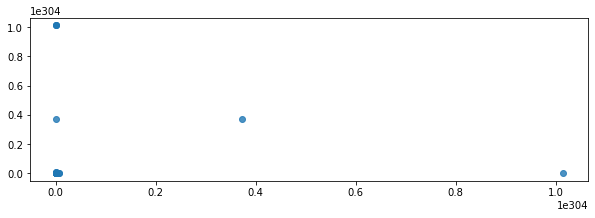

In [23]:
fig = plt.figure(figsize=(10,3))

sns.regplot(np.exp(y_test),np.exp(y_pred2))

In [25]:
#airbnb2_df.astype(int)
#knn = KNeighborsRegressor(n_neighbors=2, algorithm="brute")
#prediction = knn.predict(airbnb_train[training_col], target_col['total'])

TypeError: string indices must be integers